In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
CLASS = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks"]

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

'deer'

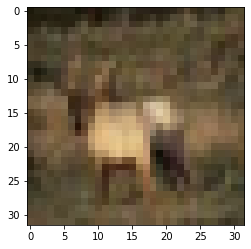

In [4]:
plt.imshow(X_train[3])
CLASS[Y_train[3, 0]]

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=len(CLASS), activation="softmax")
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [8]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [9]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 89s 41ms/step - loss: 1.3326 - acc: 0.5207
Epoch 2/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8737 - acc: 0.6963
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6945 - acc: 0.7563
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5657 - acc: 0.8028
Epoch 5/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.4634 - acc: 0.8366


In [10]:
loss, acc = model.evaluate(X_test, Y_test)
f"loss: {loss}, acc: {acc}"

313/313 [==============================] - 6s 18ms/step - loss: 0.7762 - acc: 0.7493


'loss: 0.7762287855148315, acc: 0.7493000030517578'

In [11]:
y = model.predict(X_test)

In [12]:
import numpy as np
acc = 0
for i in range(y.shape[0]):
    acc += (np.argmax(y[i]) == Y_test[i])
acc / y.shape[0]

array([0.7493])

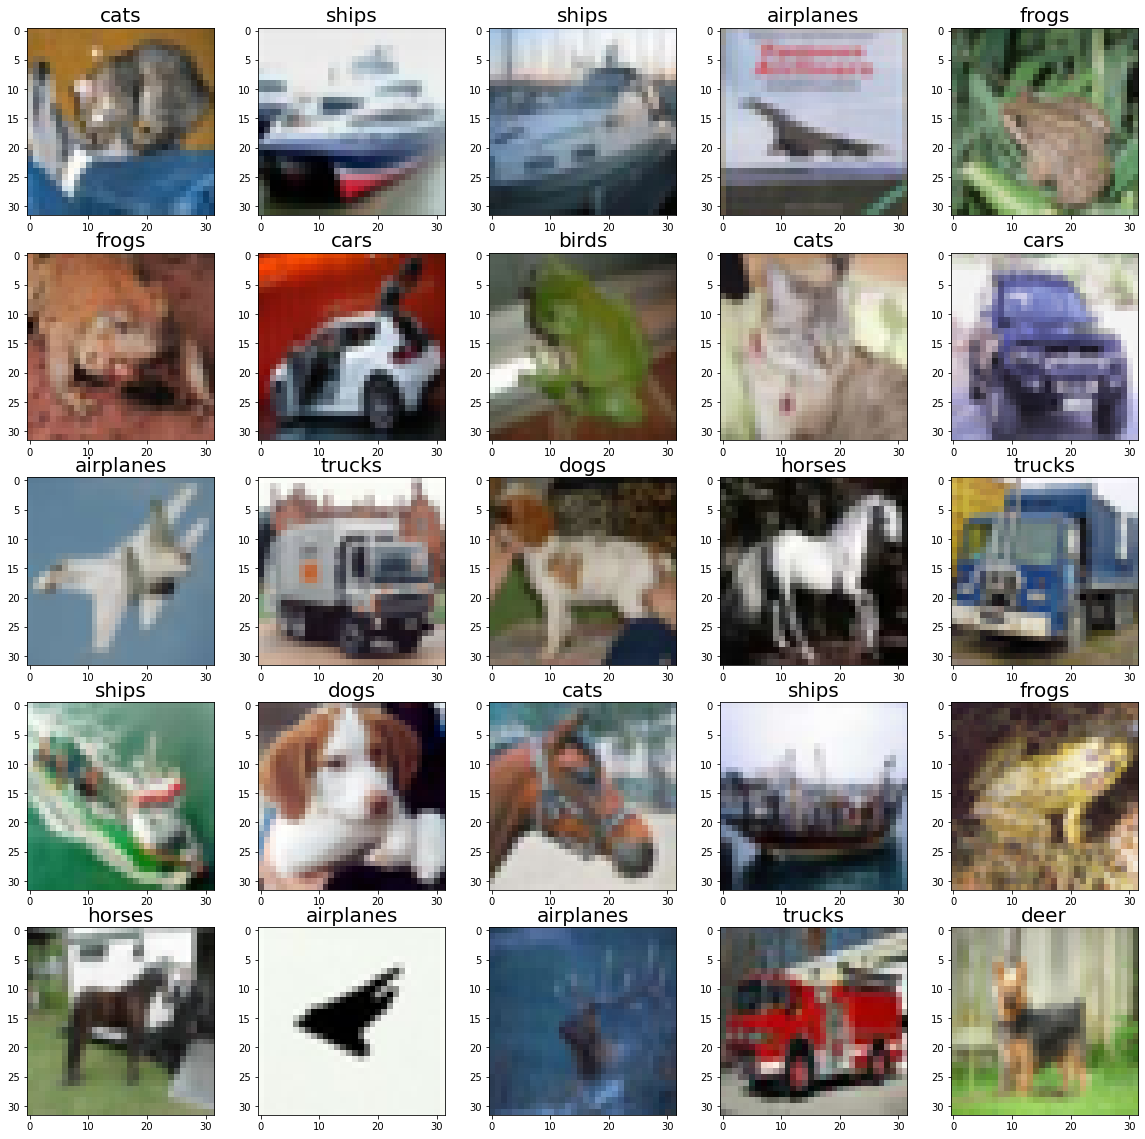

In [13]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
    for j in range(5):
        axs[i, j].imshow(X_test[i * 5 + j])
        axs[i, j].set_title(f"{CLASS[np.argmax(y[i * 5 + j])]}", fontsize=20)